#### Paso 01: Importar las librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Paso 02: Cargamos el dataset

In [8]:
ad_df = pd.read_csv('/home/bigdatafutura/caso_practico_01/dataset/advertising.csv')

In [9]:
ad_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [10]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
ad_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### Análisis exploratorio de los datos

<AxesSubplot:>

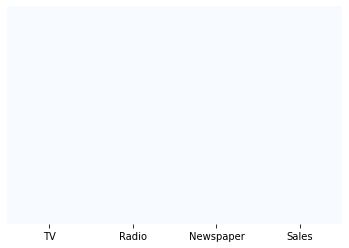

In [12]:
sns.heatmap(ad_df.isnull(), yticklabels= False, cbar = False, cmap = 'Blues')

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

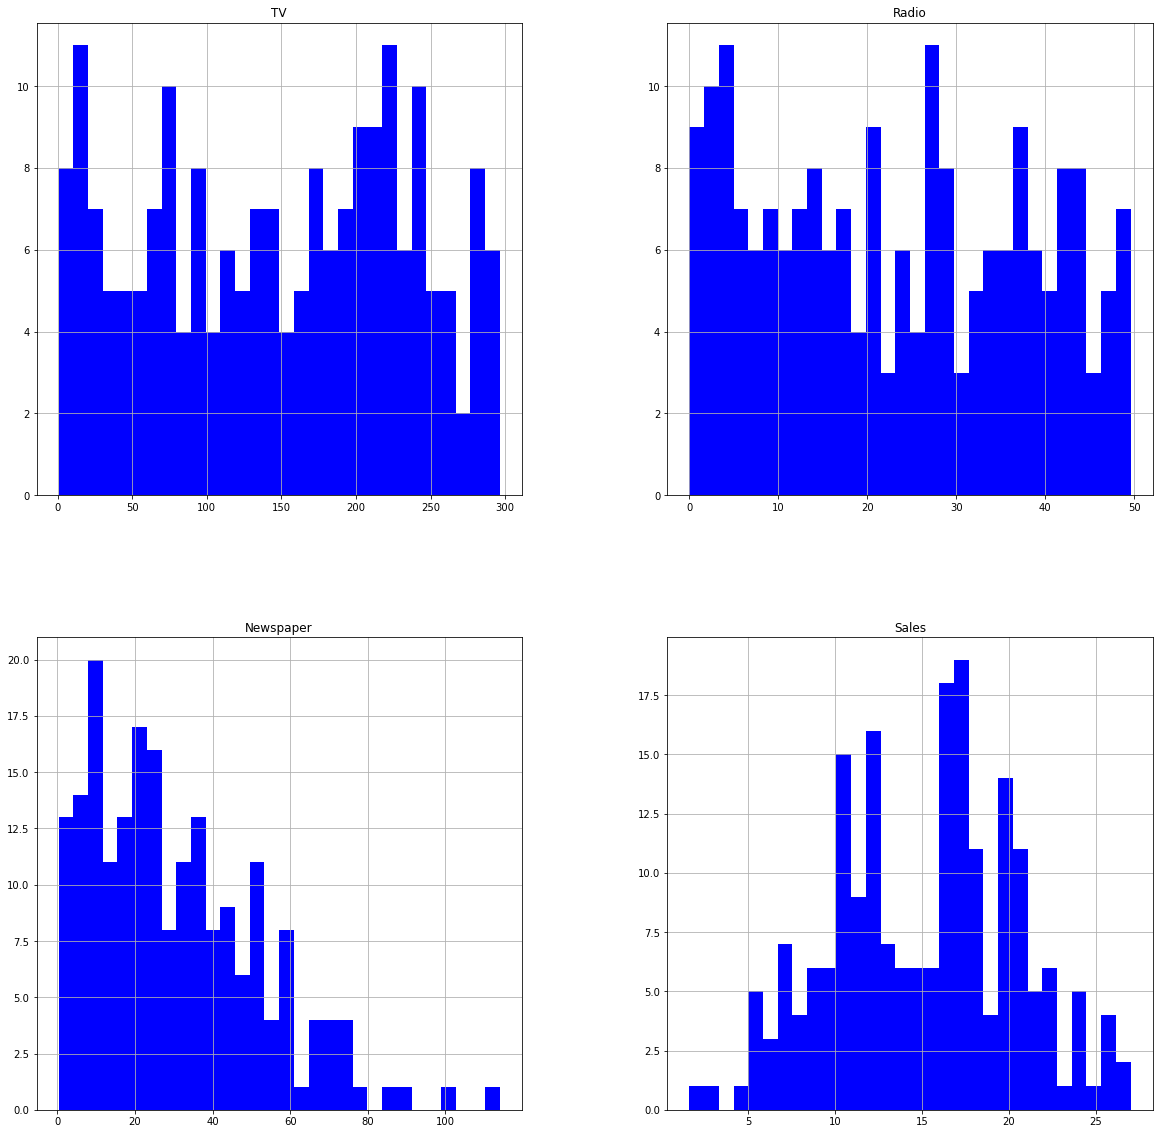

In [13]:
ad_df.hist(bins = 30, figsize = (20, 20), color = 'b')

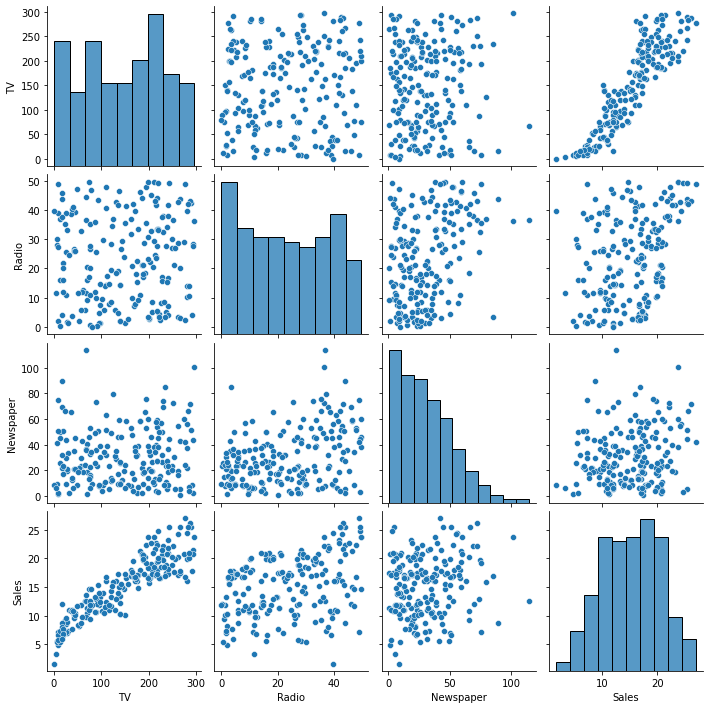

In [14]:
sns.pairplot(ad_df)

<AxesSubplot:>

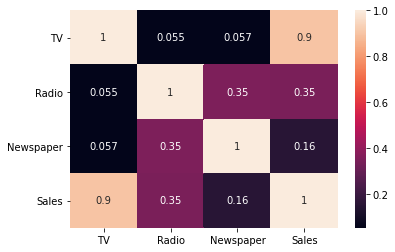

In [15]:
correlations = ad_df.corr()
sns.heatmap(correlations, annot = True)

#### Dataset de entrenamiento y de testing

In [16]:
ad_df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [17]:
X = ad_df[['TV', 'Radio', 'Newspaper']]

In [18]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
X.shape

(200, 3)

In [20]:
y = ad_df['Sales']

In [21]:
y.shape

(200,)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
X_train.shape

(160, 3)

In [31]:
X_test.shape

(40, 3)

#### Entrenamiento del modelo

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)
print('Linear Model Coeff (m):', regressor.coef_)
print('Linear Model Coeff(b):', regressor.intercept_)

Linear Model Coeff (m): [ 0.05386441  0.10876072 -0.00025557]
Linear Model Coeff(b): 4.606925913706917


#### Evaluar el modelo

In [36]:
y_predict = regressor.predict(X_test)
y_predict

array([ 8.14733698, 15.64639519, 16.54077658, 15.74520474, 19.14355866,
       10.22514621, 20.78838621, 13.65358781, 24.75669202, 12.44530014,
       18.77375714,  7.03455555,  9.50296779, 20.30639887, 21.0718061 ,
       13.32274942,  9.84677137, 13.12200561, 15.72860684, 10.68344743,
       12.21044091, 13.21017374, 20.94995456,  7.14231383, 18.33150093,
       10.85228799, 15.50530224, 23.02470454,  7.70072426, 20.54922969,
        8.80539315, 21.16656695,  6.9242149 , 18.78085009, 24.79893944,
       17.96010035, 16.71700759, 16.84480828, 10.37477813,  6.30215549])

In [37]:
y_test

78      5.3
9      15.6
194    17.3
112    17.1
25     17.0
136     9.5
52     22.6
116    12.2
183    26.2
115    12.6
74     17.0
22      5.6
107    12.0
15     22.4
169    20.0
180    15.5
191    11.9
83     13.6
171    17.5
13     13.7
16     12.5
7      13.2
28     18.9
106     7.2
146    18.2
143    10.4
4      17.9
147    25.4
60      8.1
185    22.6
117     9.4
104    20.7
189     6.7
11     17.4
98     25.4
81     17.3
162    19.9
97     20.5
5       7.2
91      7.3
Name: Sales, dtype: float64

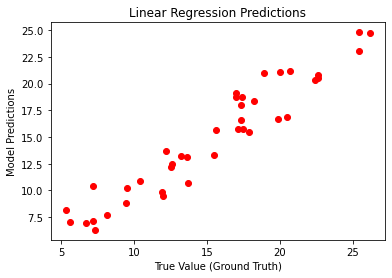

In [38]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Value (Ground Truth)')
plt.title('Linear Regression Predictions')
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
MAPE = np.mean( np.abs( (y_test - y_predict) / y_test ) ) * 100

In [40]:
print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nMean Absolute Percentage Error =', MAPE, '%')

RMSE = 1.73 
MSE = 2.9920624442394597 
MAE = 1.4064061203860008 
Mean Absolute Percentage Error = 10.631027484453417 %
